Iris DataSet :

This is the "Iris" dataset. Originally published at UCI Machine Learning Repository: Iris Data Set, this small dataset from 1936 is often used for testing out machine learning algorithms and visualizations (for example, Scatter Plot). Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.

Date : 4-6-2024

Size:  750
Shape: (150, 5)
Dimension:  2
Model 1 trained
Type of x_test:  <class 'pandas.core.frame.DataFrame'>
Model 2 trained
         Actual   Predicted Predicted_2
114   virginica   virginica   virginica
62   versicolor  versicolor  versicolor
33       setosa      setosa      setosa
107   virginica   virginica   virginica
7        setosa      setosa      setosa
100   virginica   virginica   virginica
40       setosa      setosa      setosa
86   versicolor  versicolor  versicolor
76   versicolor  versicolor  versicolor
71   versicolor  versicolor  versicolor

Accuracy of model 1:  0.94
Accuracy of model 2:  0.96

Cross Validation of RFClassifier:  [1.  1.  0.9 1.  1.  1.  0.8 1.  0.9 0.9 0.9 0.9 0.9 1.  1. ]
Mean of RFClassifier:  0.9466666666666668
Cross Validation of KNN Classifier:  [1.  1.  0.9 1.  1.  1.  0.7 1.  1.  0.9 0.9 1.  1.  1.  1. ]
Mean of KNN Classifier:  0.9600000000000001

Matrix
 [[16  0  0]
 [ 0 18  1]
 [ 0  2 13]]


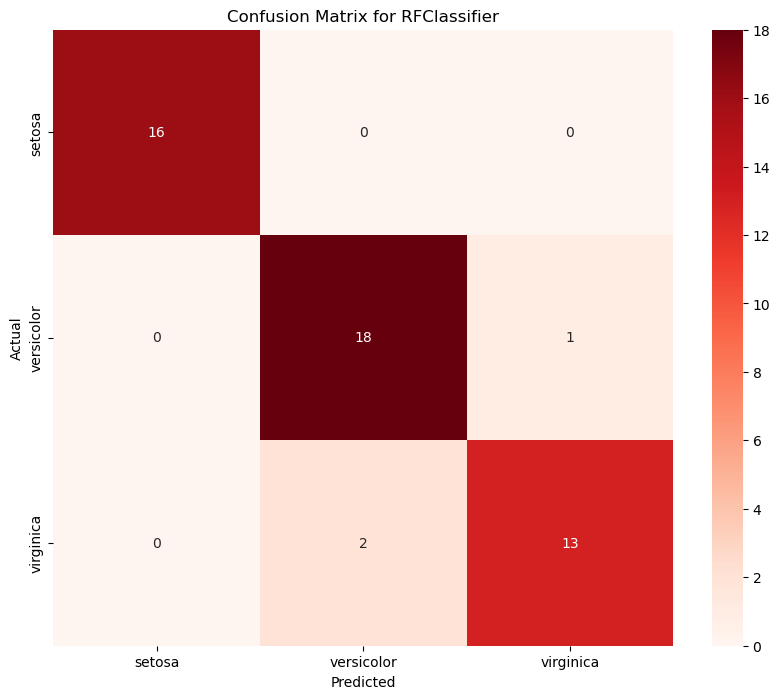


Matrix
 [[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]
Type:  <class 'numpy.ndarray'>


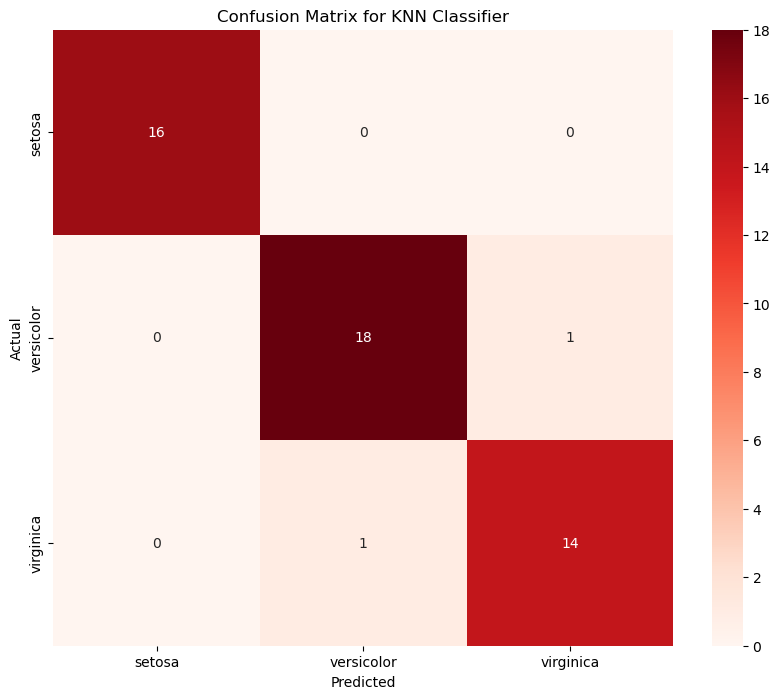

'\nsepal_length = float(input("Enter sepal length: "))\nsepal_width = float(input("Enter sepal width: "))\npetal_length = float(input("Enter petal length: "))\npetal_width = float(input("Enter petal width: "))\n\n\nx_pred = pd.DataFrame({\'sepal length (cm)\': [sepal_length], \'sepal width (cm)\': [sepal_width], \n                       \'petal length (cm)\': [petal_length], \'petal width (cm)\': [petal_width]})\n\nprint(x_pred)\n\ny_pred_3 = model_1.predict(x_pred)\nprint("The species of iris from given data is ",str(y_pred_3))\n'

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Import data set: iris 
iris = load_iris(return_X_y=True)

# Create a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add a new column for the species name
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
#print(df)

# Save the DataFrame to a csv file
df.to_csv('iris.csv', index=False)

# Create space between the columns in csv file
#df.to_csv('iris.csv', sep='\t', index=False)

# Size, shape and dimension of the data
print("Size: ",df.size)
print("Shape:", df.shape)
print("Dimension: ", df.ndim)

x = df.iloc[:, 0:4]
y = df.iloc[:, 4]

#print("x: ", x)
#print("y: ", y)

#
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=42)

# Random Forest Classifier hyperparameters

model_1 = RandomForestClassifier(n_estimators=10, random_state=42)
model_1.fit(x_train, y_train)
print("Model 1 trained")
y_pred_1 = model_1.predict(x_test)
#print(y_pred_1)
#print("Type of x_test: ", type(x_test))

# KNN Classifier

model_2 = KNeighborsClassifier(n_neighbors=3)

# Train the model

model_2.fit(x_train, y_train)
print("Model 2 trained")

# Predict the model

y_pred_2 = model_2.predict(x_test)
#print(y_pred_2)

# Actual vs Predicted

df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1, 'Predicted_2': y_pred_2})
#print(df_new.head(10))

# Accuracy

print("\nAccuracy of model 1: ", accuracy_score(y_test, y_pred_1))

print("Accuracy of model 2: ", accuracy_score(y_test, y_pred_2))

# Cross Validation
# Date : 7-6-2024

cross_val = cross_val_score(model_1, x, y, cv=15)
print("\nCross Validation of RFClassifier: ", cross_val)
print("Mean of RFClassifier: ", cross_val.mean())

cross_val = cross_val_score(model_2, x, y, cv=15)
print("Cross Validation of KNN Classifier: ", cross_val)
print("Mean of KNN Classifier: ", cross_val.mean())

# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred_1)
print("\nMatrix\n",conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Reds',xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RFClassifier')
plt.show()

# Confusion Matrix @ model 2

conf_matrix = confusion_matrix(y_test, y_pred_2)
print("\nMatrix\n",conf_matrix)
print("Type: ", type(conf_matrix))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Reds',xticklabels=iris.target_names, yticklabels=iris.target_names,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Identify Label given in input

"""
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))


x_pred = pd.DataFrame({'sepal length (cm)': [sepal_length], 'sepal width (cm)': [sepal_width], 
                       'petal length (cm)': [petal_length], 'petal width (cm)': [petal_width]})

print(x_pred)

y_pred_3 = model_1.predict(x_pred)
print("The species of iris from given data is ",str(y_pred_3))
"""

Take user input for of x_test and predict y_test

In [2]:
# Take user input for of x_test and predict y_test
import pandas as pd

sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))


x_pred = pd.DataFrame({'sepal length (cm)': [sepal_length], 'sepal width (cm)': [sepal_width], 
                       'petal length (cm)': [petal_length], 'petal width (cm)': [petal_width]})

print(x_pred)

y_pred_3 = model_1.predict(x_pred)
print(y_pred_3)

# nlp - natural language processing
# covid-19
# rainfall prediction
# decision tree
# cross validation
# mlp - multi layer perceptron
# Over fitting and under fitting

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2


NameError: name 'model_1' is not defined

Accuracy of MLP:  0.98

Matrix
 [[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]


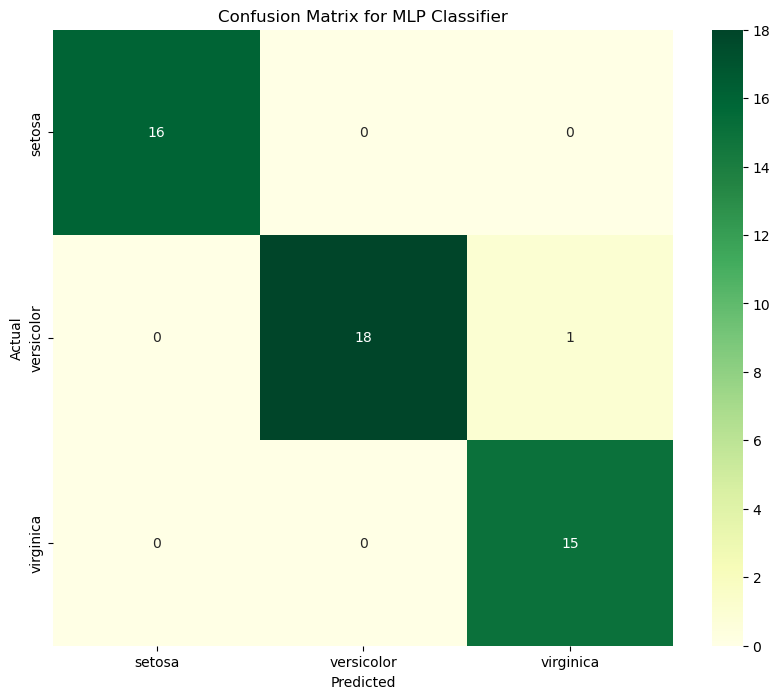

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

MLP = MLPClassifier(activation="relu" ,max_iter=1000)

MLP.fit(x_train, y_train)
y_pred_mlp = MLP.predict(x_test)
print("Accuracy of MLP: ", accuracy_score(y_test, y_pred_mlp))

# Create heatmap

conf_matrix = confusion_matrix(y_test, y_pred_mlp)
print("\nMatrix\n",conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='YlGn',xticklabels=iris.target_names, yticklabels=iris.target_names,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLP Classifier')
plt.show()

# Check if the model is overfitting or underfitting


